In [1]:
data1= read.csv("E0_2020_2021.csv",header = TRUE)
data2= read.csv("E0_2019_2020.csv",header = TRUE)
data3= read.csv("E0_2018_2019.csv",header = TRUE)

data1=data1[,c(4:39)]
data2=data2[,c(4:39)]
data3=data3[,c(3:38)]
dataset=rbind(data1,data2,data3)

matchid=1:length(row.names.data.frame(dataset))
dataset=cbind(matchid,dataset)

I combined English Premier League data of Season 2020/2021, Season 2019/2020 and Season 2018/2019 and then I added an additional column which is matchid to the combined dataset.

In [4]:
odd_for_B365<-dataset[,c(1:3,23:25)]
odd_for_BW<-dataset[,c(1:3,26:28)]
odd_for_IW<-dataset[,c(1:3,29:31)]
odd_for_PS<-dataset[,c(1:3,32:34)]
odd_for_WH<-dataset[,c(1:3,35:37)]


probs_B365<-1/odd_for_B365[,4:6]
probs_BW<-1/odd_for_BW[,4:6]
probs_IW<-1/odd_for_IW[,4:6]
probs_PS<-1/odd_for_PS[,4:6]
probs_WH<-1/odd_for_WH[,4:6]

denom_B365<-rowSums(probs_B365)
denom_BW<-rowSums(probs_BW)
denom_IW<-rowSums(probs_IW)
denom_PS<-rowSums(probs_PS)
denom_WH<-rowSums(probs_WH)


norm_probs_B365<-probs_B365/denom_B365
norm_probs_B365[,4] <- matchid 
names(norm_probs_B365)[4] <- "Matchid"

norm_probs_BW<-probs_BW/denom_BW
norm_probs_BW[,4] <- matchid 
names(norm_probs_BW)[4] <- "Matchid"

norm_probs_IW<-probs_IW/denom_IW
norm_probs_IW[,4] <- matchid 
names(norm_probs_IW)[4] <- "Matchid"

norm_probs_PS<-probs_PS/denom_PS
norm_probs_PS[,4] <- matchid 
names(norm_probs_PS)[4] <- "Matchid"

norm_probs_WH<-probs_WH/denom_WH
norm_probs_WH[,4] <- matchid 
names(norm_probs_WH)[4] <- "Matchid"

Probabilities and normalized probabilities for bookmakers B365, BW, IW, PS and WH are calculated using the formula in the homework sheet.

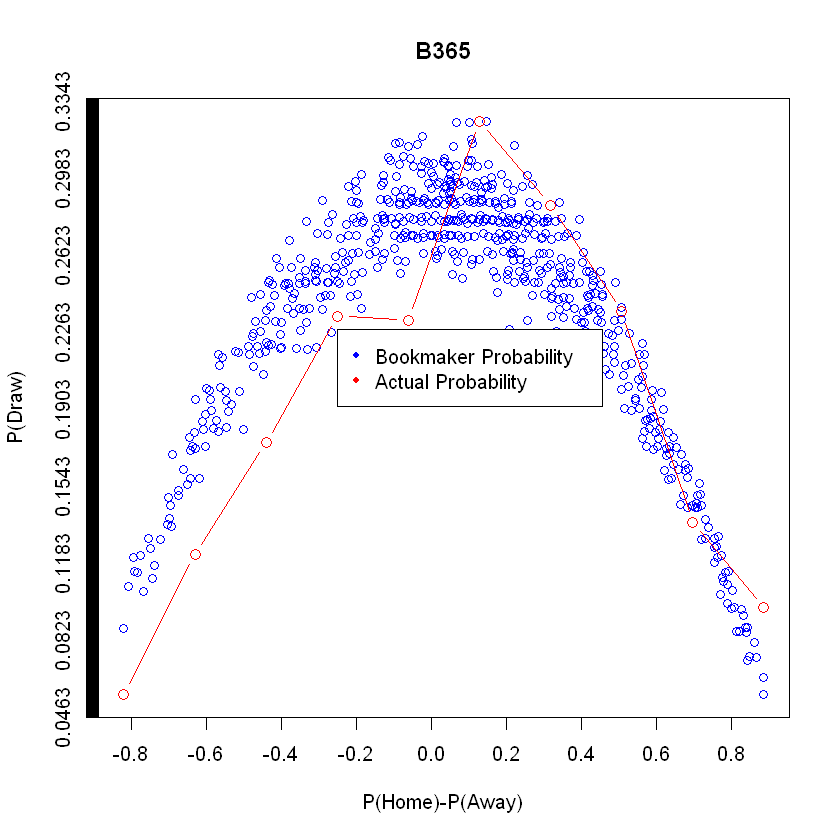

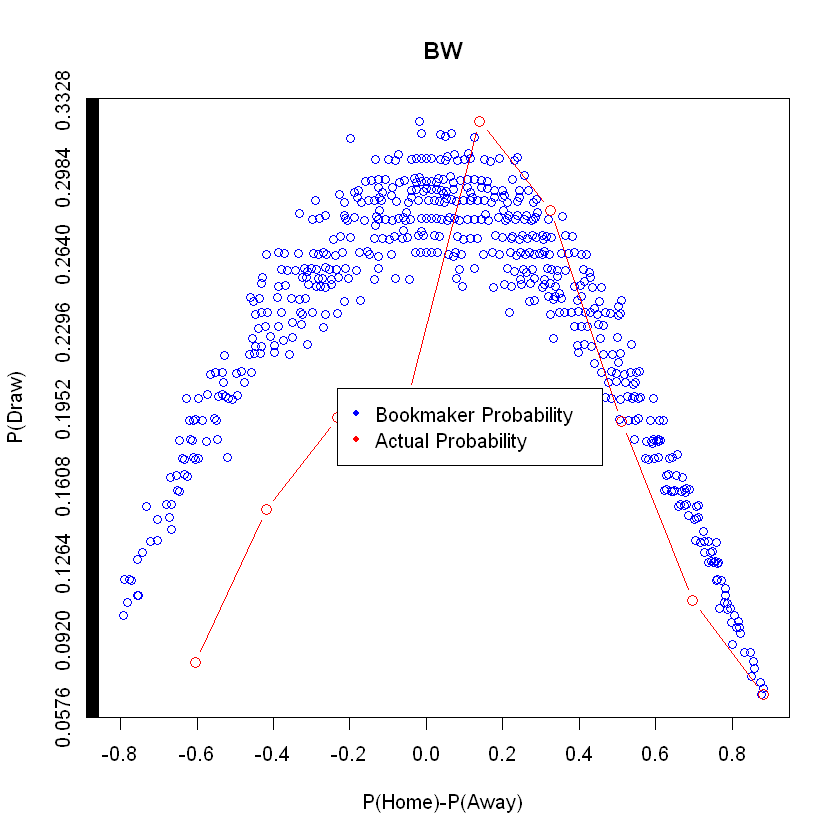

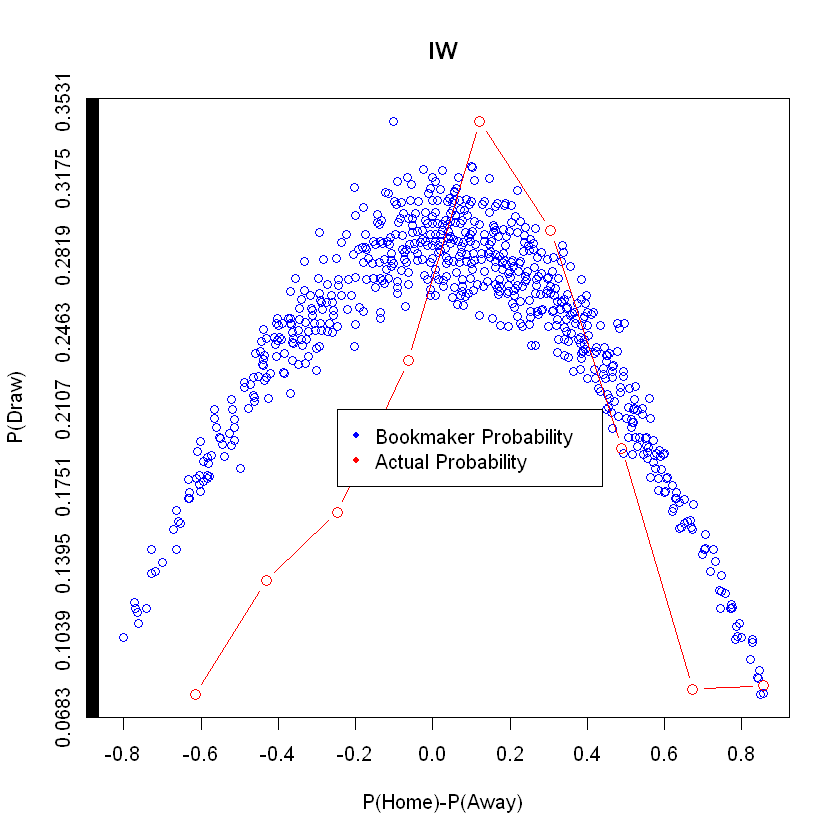

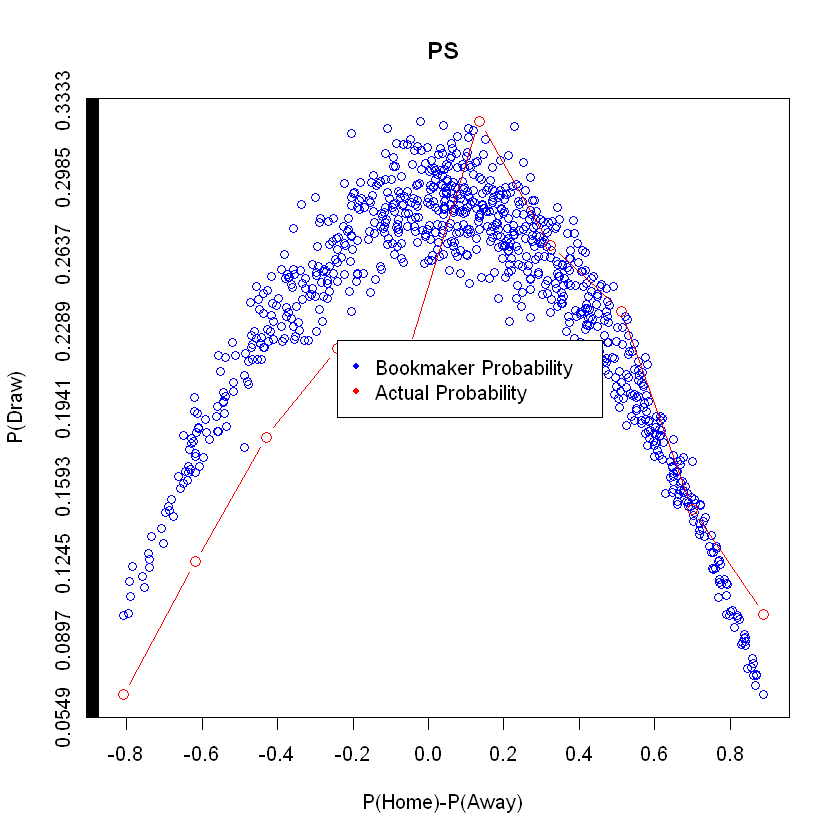

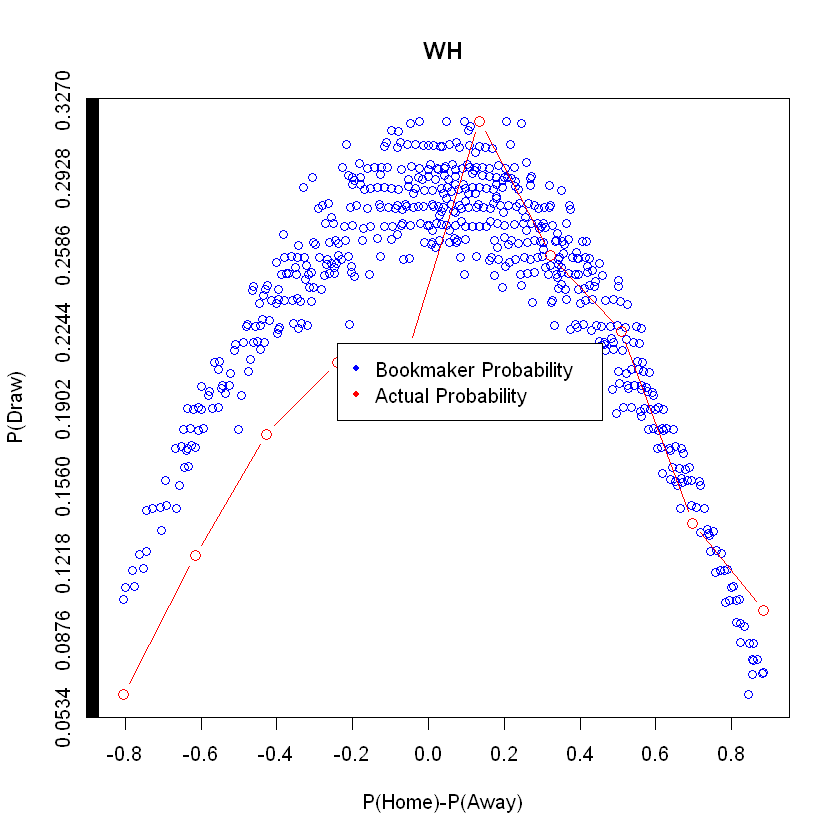

In [12]:
bookmaker_probs=list(norm_probs_B365,norm_probs_BW,norm_probs_IW,norm_probs_PS,norm_probs_WH)
bookmaker_names=list('B365','BW','IW','PS','WH')
dataGames=dataset[,c(1,6)]
names(dataGames)[1] <- "Matchid"
sampleprob=c()

for (i in 1:length(bookmaker_probs)){
  mergedprob<- merge(bookmaker_probs[i],dataGames, by="Matchid")
  mergedprob=mergedprob[c(1,5,2,3,4)]
  
  bin1<-mergedprob[(mergedprob[,3]-mergedprob[,5])<=(-0.8)&(mergedprob[,3]-mergedprob[,5])>(-1),2]
  bin2<-mergedprob[(mergedprob[,3]-mergedprob[,5])<=(-0.6)&(mergedprob[,3]-mergedprob[,5])>(-0.8),2]
  bin3<-mergedprob[(mergedprob[,3]-mergedprob[,5])<=(-0.4)&(mergedprob[,3]-mergedprob[,5])>(-0.6),2]                               
  bin4<-mergedprob[(mergedprob[,3]-mergedprob[,5])<=(-0.2)&(mergedprob[,3]-mergedprob[,5])>(-0.4),2]                               
  bin5<-mergedprob[(mergedprob[,3]-mergedprob[,5])<=(0) &(mergedprob[,3]-mergedprob[,5])>(-0.2),2]                               
  bin6<-mergedprob[(mergedprob[,3]-mergedprob[,5])<=(0.2)&(mergedprob[,3]-mergedprob[,5])>0, 2]                               
  bin7<-mergedprob[(mergedprob[,3]-mergedprob[,5])<=(0.4)&(mergedprob[,3]-mergedprob[,5])>0.2,2]                               
  bin8<-mergedprob[(mergedprob[,3]-mergedprob[,5])<=(0.6)&(mergedprob[,3]-mergedprob[,5])>0.4,2]
  bin9<-mergedprob[(mergedprob[,3]-mergedprob[,5])<=(0.8)&(mergedprob[,3]-mergedprob[,5])>(0.6),2]                          
  bin10<-mergedprob[(mergedprob[,3]-mergedprob[,5])<=1 &(mergedprob[,3]-mergedprob[,5])>0.8,2]
 
  sampleprob[1]<-length(bin1[which(bin1=="D")])/length(bin1)
  sampleprob[2]<-length(bin2[which(bin2=="D")])/length(bin2)
  sampleprob[3]<-length(bin3[which(bin3=="D")])/length(bin3)
  sampleprob[4]<-length(bin4[which(bin4=="D")])/length(bin4)
  sampleprob[5]<-length(bin5[which(bin5=="D")])/length(bin5)
  sampleprob[6]<-length(bin6[which(bin6=="D")])/length(bin6)
  sampleprob[7]<-length(bin7[which(bin7=="D")])/length(bin7)
  sampleprob[8]<-length(bin8[which(bin8=="D")])/length(bin8)
  sampleprob[9]<-length(bin9[which(bin9=="D")])/length(bin9)
  sampleprob[10]<-length(bin10[which(bin10=="D")])/length(bin10)
    
  plot((mergedprob[,3]-mergedprob[,5]), mergedprob[,4], type="p",axes=FALSE,col='blue', xlab="P(Home)-P(Away)", ylab="P(Draw)",main = bookmaker_names[i])
  axis(side=1, at=seq(-1, 1, by=0.2))
  axis(side=2, at=seq(0,0.4 ,by=0.0001))
  par(new=TRUE)
  plot(sampleprob,type="b", col="red", xaxt="n", yaxt="n", ann=FALSE, cex=1.2)
  legend(x=(4),y=(0.2),legend=c("Bookmaker Probability","Actual Probability"),col=c(4,2), pch=20)
  
}


I discretized P(home win) – P(away win) values into bins (e.g. (-1,-0.8], (-
0.8, -0.6], …, (0.8,1]) for each bookmaker using a for loop. And, in this for loop, I calculated the number of games ended as “Draw” in the corresponding bin. Then, I estimated probability of draws by dividing the number of games ended as “Draw” by the length of the corresponding bin. In general, around 7th  bin ((0.2,0.4]) , all companies underestimated drawing probability of the games. Also, around 10th bin (0.8,1) B365,PS and WH companies underestimated drawing probability of the games. Thus, one can make money by betting on draw at games for which announced odds yield that interval. In my opinion, if the game is conducted by two teams with similar strength companies are more likely to use their votes against away teams since they think home teams have supporter advantage. However, they may increase their draw probabilities by keeping P(home win) – P(away win) constant not to underestimate drawing probability of the games. In addition, the bookmaker probability lines have not been well-aligned with the actual outcome of the matches. Therefore, we can say that there is no bias observed.
